In [7]:
"VISIONS-2 data plotter"

'VISIONS-2 data plotter'

### Load basic VISIONS-2 data

In [3]:
import sys 
sys.path.append('/Users/abrenema/Desktop/code/Aaron/github/mission_routines/rockets/visions2/')
sys.path.append('/Users/abrenema/Desktop/code/Aaron/github/plasma-physics-general/')
import visions2_load_data
import numpy as np 
import matplotlib.pyplot as plt

#Enable auto module reloading
%load_ext autoreload
%autoreload 2

"""Load Langmuir Probe data"""
lp = visions2_load_data.load_langmuir()
lp.keys()
print("size of lp = ", np.size(lp["times"]))

"""Load magnetometer data"""
mag = visions2_load_data.load_mag()
print("size of mag = ", np.size(mag["fce"]))
print(mag.keys())


"""Load particle data"""
#All particle data
y2 = visions2_load_data.load_particle()

#Sum over all PA 
y2e = visions2_load_data.load_particle(range=[89,91],sumtype=1)

#Sum over all energies
y2p = visions2_load_data.load_particle(range=[1000,2000],sumtype=2)



"""Load VLF data"""
vlf12_data = visions2_load_data.load_vlf()
vlf12_data.keys()
#vlf12_data
print(vlf12_data["calibrations"])

vlf12 = vlf12_data["dvlf12"]
times_vlf = vlf12_data["tvlf12"]
#sampling freq
sr = [1/(times_vlf[i+1]-times_vlf[i]) for i in range(times_vlf.size-1)]
fsVLF = np.mean(sr)








The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
size of lp =  48730
LOAD MAG: Currently low flyer only!
size of mag =  397917
dict_keys(['mag_bon_xyz', 'times', 'bo', 'fce', 'fcH', 'fcO'])
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD VLF: Currently low flyer only
b'Gain=14.35, boomlength=6.1m, full voltage range=+/- 2.5V'


### Get lower hybrid and other important frequencies

/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_84831/1320580112.py:21: RuntimeWarning: divide by zero encountered in log10
  pcm1 = axs[0].pcolormesh(d1["eeas_hires_ftime_gsfc"], d1["eeas_hires_energy_gsfc"], np.transpose(np.log10(d1["eeas_hires_eflux_gsfc"])), shading='gouraud', cmap='turbo',vmin=vmin,vmax=vmax)
/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_84831/1320580112.py:25: RuntimeWarning: divide by zero encountered in log10
  pcm2 = axs[1].pcolormesh(d["eeas_hires_ftime_gsfc"], d["eeas_hires_energy_gsfc"], np.transpose(np.log10(d["eeas_hires_eflux_gsfc"][:,:,10])), shading='gouraud', cmap='turbo',vmin=vmin,vmax=vmax)
/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_84831/1320580112.py:41: RuntimeWarning: divide by zero encountered in log10
  pcm1 = axs[2].pcolormesh(d2["eeas_hires_ftime_gsfc"], d2["eeas_hires_pitchnom_gsfc"][sort], np.transpose(np.log10(d2["eeas_hires_eflux_gsfc"][:,sort])), shading='gouraud', cmap='turbo',vmin=vmin,vmax=vmax

Here


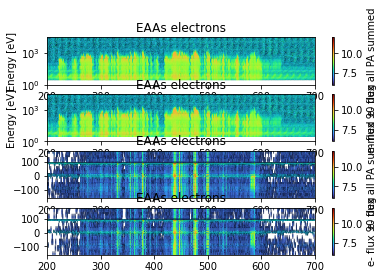

In [11]:
"""Test plot the particle data as compared to the integrated particle data"""

import sys 
import numpy as np
import visions2_load_data
import matplotlib.pyplot as plt


fig, axs = plt.subplots(4)

#Set log z-scale for particle fluxes
vmin = 6 
vmax = 12

d1 = y2e["eea_data"]
d2 = y2p["eea_data"]
d = y2["eea_data"]

pcm1 = axs[0].pcolormesh(d1["eeas_hires_ftime_gsfc"], d1["eeas_hires_energy_gsfc"], np.transpose(np.log10(d1["eeas_hires_eflux_gsfc"])), shading='gouraud', cmap='turbo',vmin=vmin,vmax=vmax)
axs[0].set_title("EAAs electrons")
fig.colorbar(pcm1, label="e- flux all PA summed", ax=axs[0])

pcm2 = axs[1].pcolormesh(d["eeas_hires_ftime_gsfc"], d["eeas_hires_energy_gsfc"], np.transpose(np.log10(d["eeas_hires_eflux_gsfc"][:,:,10])), shading='gouraud', cmap='turbo',vmin=vmin,vmax=vmax)
axs[1].set_title("EAAs electrons")
fig.colorbar(pcm2, label="e- flux 90 deg", ax=axs[1])

for i in axs: i.set_xlim(200, 700)
for i in range(2): 
    axs[i].set_yscale('log')
    axs[i].set_ylim(1, 30000)
    axs[i].set_ylabel("Energy [eV]")
    axs[i].set_xlabel("MET (sec)")




sort = np.argsort(d2["eeas_hires_pitchnom_gsfc"])

pcm1 = axs[2].pcolormesh(d2["eeas_hires_ftime_gsfc"], d2["eeas_hires_pitchnom_gsfc"][sort], np.transpose(np.log10(d2["eeas_hires_eflux_gsfc"][:,sort])), shading='gouraud', cmap='turbo',vmin=vmin,vmax=vmax)
axs[2].set_title("EAAs electrons")
fig.colorbar(pcm1, label="e- flux all PA summed", ax=axs[2])

pcm2 = axs[3].pcolormesh(d["eeas_hires_ftime_gsfc"], d["eeas_hires_pitchnom_gsfc"][sort], np.transpose(np.log10(d["eeas_hires_eflux_gsfc"][:,31,sort])), shading='gouraud', cmap='turbo',vmin=vmin,vmax=vmax)
axs[3].set_title("EAAs electrons")
fig.colorbar(pcm2, label="e- flux 90 deg", ax=axs[3])


#for i in axs: i.set_xlim(200, 700)
for i in range(2,2): 
    axs[i].set_yscale('linear')
    axs[i].set_ylim(-180,180)
    axs[i].set_ylabel("Pitch-angle [deg]")
    axs[i].set_xlabel("MET (sec)")



print("Here")






In [ ]:
#Test integrating over particle data 

np.shape(y2["eea_data"]) 
np.size(y2)
#dict_keys(['eeas_hires_eflux_gsfc', 'eeas_hires_ftime_gsfc', 'eeas_hires_energy_gsfc', 'eeas_hires_pitchnom_gsfc'])




In [ ]:

import plasma_params_get_flhr_freq

#Interpolate Langmuir probe density values to the time cadence of mag data. 
ne = np.interp(mag["times"], lp["times"], lp["ne"])

nH_ne = [0.] * np.size(mag["times"]) #fraction of H+
nO_ne = [1.] * np.size(mag["times"]) #fraction of O+
#print(np.type(np.size(mag["times"])))

#ne = 7e4  #rough value from Hassan's Langmuir probe results.
#1e4 gives a much better flhr when compared to the VLF data...Not sure what's going on here. 
#ne = 2e10 / (100.*100.*100.) #cm-3 (Typical value (e.g. Kintner "Sounding of Cusp ion fountain" fig 8))


#First test applicability of high density limit. 
#flhr_test = visions2_get_flhr.flhr_HighDensityLimitTest(ne, mag["fce"], mag["fcH"])
flhr_test = plasma_params_get_flhr_freq.flhr_HighDensityLimitTest(ne, mag["fce"], mag["fcH"])
print(flhr_test["info"])
print("fpi/fce*fci = ", np.median(flhr_test["fpi_fcefci"]))


#flhr in high density limit for pure H+ and O+ plasmas
flhr_highdens_H = plasma_params_get_flhr_freq.flhr_HighDensityLimit(mag["fce"], mag["fcH"])  #100% H+
flhr_highdens_O = plasma_params_get_flhr_freq.flhr_HighDensityLimit(mag["fce"], mag["fcO"])  #100% O+
print("flhr_highdens_H = ", np.median(flhr_highdens_H))
print("flhr_highdens_O = ", np.median(flhr_highdens_O))

#flhr w/o high density assumption
print(np.median(mag["fce"]))
print(ne)
flhr_MassFrac = plasma_params_get_flhr_freq.flhr_IonMassFractions(ne, mag["fce"], nH_ne, nO_ne)
print("flhr_MassFrac = ", np.median(flhr_MassFrac))
#plt.plot(flhr_MassFrac)


#Lower hybrid frequency (not in high density limit) for full H+ and full O+
flhr_H = plasma_params_get_flhr_freq.flhr_H(ne, mag["fce"], mag["fcH"])
flhr_O = plasma_params_get_flhr_freq.flhr_H(ne, mag["fce"], mag["fcO"])
print("flhr_H = ", np.median(flhr_H))
print("flhr_O = ", np.median(flhr_O))





### Test out flhr curves

(5000.0, 9000.0)

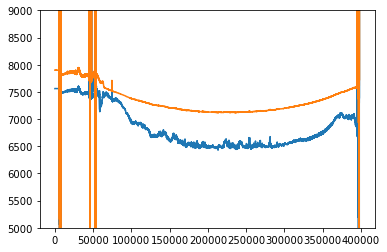

In [5]:
#Test plotting for flhr 

#plt.plot(flhr_highdens_O)
plt.plot(flhr_MassFrac)
plt.plot(flhr_O)
plt.ylim(5000, 9000)

#flhr_highdens_H = plasma_params_get_flhr_freq.flhr_HighDensityLimit(mag["fce"], mag["fcH"])  #100% H+
#flhr_highdens_O = plasma_params_get_flhr_freq.flhr_HighDensityLimit(mag["fce"], mag["fcO"])  #100% O+
#flhr_MassFrac = plasma_params_get_flhr_freq.flhr_IonMassFractions(ne, mag["fce"], nH_ne, nO_ne)
#flhr_H = plasma_params_get_flhr_freq.flhr_H(ne, mag["fce"], mag["fcH"])
#flhr_O = plasma_params_get_flhr_freq.flhr_H(ne, mag["fce"], mag["fcO"])



### Plot VLF wave overview

(1.0, 10000.0)

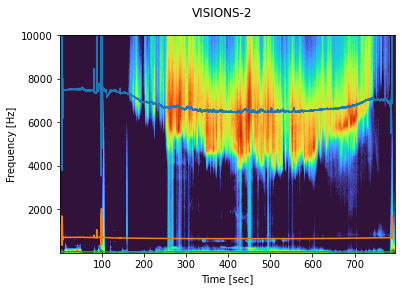

In [10]:
#Plot VLF waves

fig, axs = plt.subplots(1)
fig.suptitle('VISIONS-2 low-flyer VLF')

kwargs = {"vmin":-50, "vmax":-10}
Sxx, specfreqs, spectimes, im = axs.specgram(vlf12, Fs=fsVLF, NFFT=512, scale='dB', **kwargs, cmap='turbo')

fcH_interp = np.interp(spectimes, mag["times"], mag["fcH"])
fcO_interp = np.interp(spectimes, mag["times"], mag["fcO"])
flh_interp = np.interp(spectimes, mag["times"], flhr_MassFrac)
axs.plot(spectimes, flh_interp)
axs.plot(spectimes, fcH_interp)
axs.plot(spectimes, fcO_interp)
axs.set_ylabel('Frequency [Hz]')
axs.set_xlabel('Time [sec]')
axs.set_yscale('linear')
axs.set_ylim(1,10000)



### Plot VLF waves and electrons

NameError: name 'flhrO' is not defined

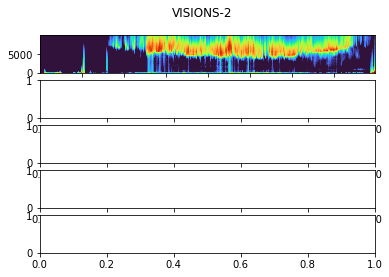

In [7]:
fig, axs = plt.subplots(5)
#fig, axs = plt.subplots(2)
fig.suptitle('VISIONS-2')

kwargs = {"vmin":-50, "vmax":-10}
#kwargs = {"vmin":np.min(SxxdB), "vmax":np.max(SxxdB)}
Sxx, specfreqs, spectimes, im = axs[0].specgram(vlf12, Fs=fsVLF, NFFT=512, scale='dB', **kwargs, cmap='turbo')
SxxdB = 10*np.log10(Sxx)

fcH_interp = np.interp(spectimes, mag["times"], mag["fcH"])
fcO_interp = np.interp(spectimes, mag["times"], mag["fcO"])
flh_interp = np.interp(spectimes, mag["times"], flhrO)
#axs[0].plot(spectimes, fcH_interp)
#axs[0].plot(spectimes, fcO_interp)
axs[0].plot(spectimes, flh_interp)
axs[0].set_ylabel('Frequency [Hz]')
axs[0].set_xlabel('Time [sec]')
#axs[0].set_yscale('log')
axs[0].set_yscale('linear')
#axs[0].set_ylim(np.min(specfreqs), np.max(specfreqs))
axs[0].set_ylim(1,15000)
#axs[0].set_ylim(100,600)
#fig.colorbar(im, label="VLF12 [mV/m]^2/Hz dB", ax=axs[0])
fig.colorbar(im, label="VLF12 dB", ax=axs[0])

#Set log z-scale for particle fluxes
vmin = 6 
vmax = 12

pcm1 = axs[1].pcolormesh(tmpt, tmpe, np.transpose(np.log10(tmpv0)), shading='gouraud', cmap='turbo',vmin=vmin,vmax=vmax)
axs[1].set_title("EAAs electrons")
fig.colorbar(pcm1, label="e- flux downward", ax=axs[1])

pcm2 = axs[2].pcolormesh(tmpt, tmpe, np.transpose(np.log10(tmpv90)), shading='gouraud', cmap='turbo',vmin=vmin,vmax=vmax)
axs[2].set_title("EAAs electrons")
fig.colorbar(pcm2, label="e- flux 90 deg", ax=axs[2])

pcm3 = axs[3].pcolormesh(tmpt, tmpe, np.transpose(np.log10(tmpv180)), shading='gouraud', cmap='turbo',vmin=vmin,vmax=vmax)
axs[3].set_title("EAAs electrons")
fig.colorbar(pcm3, label="e- flux upward", ax=axs[3])



for i in axs: i.set_xlim(200, 700)
#for i in axs: i.set_xlim(440, 460)
for i in range(1, len(axs)): 
    axs[i].set_yscale('log')
    axs[i].set_ylim(1, 30000)
    #axs[i].set_title("EAAs electrons")
    axs[i].set_ylabel("Energy [eV]")
    axs[i].set_xlabel("MET (sec)")


pcm4 = axs[4].pcolormesh(tmpt, tmpp, np.transpose(np.log10(tmpvPA)), shading='gouraud', cmap='turbo',vmin=vmin,vmax=vmax)
axs[4].set_title("EAAs electrons")
axs[4].set_yscale('linear')
axs[4].set_ylim(-180, 180)
axs[4].set_ylabel("Pitch Angle [deg]")
axs[4].set_xlabel("MET (sec)")
fig.colorbar(pcm4, label="e- flux vs PA", ax=axs[4])



In [ ]:
collections.Counter??

In [ ]:
*int*?

An IPython quick reference card:

In [ ]:
%quickref

### Tab completion

Tab completion, especially for attributes, is a convenient way to explore the structure of any object you’re dealing with. Simply type `object_name.<TAB>` to view the object’s attributes. Besides Python objects and keywords, tab completion also works on file and directory names.

In [ ]:
collections.

### The Interactive Workflow: input, output, history

In [ ]:
17+9

In [ ]:
_+8

#### Output Control

You can suppress the storage and rendering of output if you append `;` to the last cell (this comes in handy when plotting with matplotlib, for example):

In [ ]:
4+7;

In [ ]:
_

#### Output History

The output is stored in `_N` and `Out[N]` variables:

In [ ]:
_15 == Out[15]

In [ ]:
Out

You can access previous 3 results using `_`, `__`, and `___` (single-, double-, and triple-underscore).

In [ ]:
print('last output:', _)
print('next one   :', __)
print('and next   :', ___)

#### The Input history is also available

In [ ]:
In[16]

In [ ]:
_i

In [ ]:
_ii

In [ ]:
print('last input:', _i)
print('next one  :', _ii)
print('and next  :', _iii)

In [ ]:
%history

### Accessing the Underlying Operating System

**Note:** the commands below work on Linux or Macs, but may behave differently on Windows, as the underlying OS is different. IPython's ability to access the OS is still the same, it's just the syntax that varies per OS.

In [ ]:
!pwd

In [ ]:
files = !ls
print("My current directory's files:")
print(files)

In [ ]:
!echo $files

In [ ]:
!echo {files[0].upper()}

### Magic Functions

The IPyhton 'magic' functions are a set of commands, invoked by prepending one or two `%` signs to their name, that live in a namespace separate from your normal Python variables and provide a more command-like interface.  They take flags with `--` and arguments without quotes, parentheses or commas. The motivation behind this system is two-fold:
    
- To provide an orthogonal namespace for controlling IPython itself and exposing other system-oriented functionality.

- To expose a calling mode that requires minimal verbosity and typing while working interactively.  Thus the inspiration taken from the classic Unix shell style for commands.

In [ ]:
%magic

Line vs cell magics:

In [ ]:
%timeit range(10)

In [ ]:
%%timeit
range(10)
range(100)

Line magics can be used even inside code blocks:

In [ ]:
for i in range(5):
    size = i*100
    print('size:',size) 
    %timeit range(size)

Magics can do anything they want with their input, so it doesn't have to be valid Python:

In [ ]:
%%bash
echo "My shell is:" $SHELL
echo "My memory status is:"

Another interesting cell magic: create any file you want locally from the notebook:

In [ ]:
%%writefile test.txt
This is a test file!
It can contain anything I want...

more...

In [ ]:
!cat test.txt

Let's see what other magics are currently defined in the system:

In [ ]:
%lsmagic

### Display of Complex Objects

In [ ]:
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
display(Math(r'\sqrt{a^2 + b^2}')) 

### Running Normal Python Code: execution and errors

Not only can you input normal Python code, you can even paste straight from a Python or IPython shell session:

In [ ]:
>>> # Fibonacci series:
... # the sum of two elements defines the next
... a, b = 0, 1
>>> while b < 10:
...     print(b)
...     a, b = b, a+b

In [ ]:
In [1]: for i in range(10):
   ...:     print(i, end=' ')
   ...:  

### Error Display
And when your code produces errors, you can control how they are displayed with the `%xmode` magic:

In [ ]:
%%writefile my_module.py

def f(x):
    return 1.0/(x-1)

def g(y):
    return f(y+1)

Now let's call the function `g` with an argument that would produce an error:

In [ ]:
import my_module
my_module.g(0)

### Plain Exceptions

In [ ]:
%xmode plain
my_module.g(0)

### Verbose Exceptions

In [ ]:
%xmode verbose
my_module.g(0)

The default `%xmode` is "context", which shows additional context but not all local variables.  Let's restore that one for the rest of our session.

In [ ]:
%xmode context

### Raw Input in the Notebook

Since 1.0 the IPython notebook web application support raw input which for example allow us to invoke the `%debug` magic in the notebook:

In [ ]:
my_module.g(0)

In [ ]:
%debug

Don't foget to exit your debugging session. Raw input can of course be use to ask for user input:

In [ ]:
enjoy = input('Are you enjoying this tutorial ?')
print('Enjoy is :', enjoy)

### Plotting in the Notebook

This imports numpy as `np` and matplotlib's plotting routines as `plt`, plus setting lots of other stuff for you to work interactivel very easily:

In [ ]:
%matplotlib notebook
import numpy as np
from matplotlib.pyplot import gcf

In [ ]:
x = np.linspace(0, 2*np.pi, 300)
y = np.sin(x**2)
plt.plot(x, y)
plt.title("A little chirp")
f = gcf()  # let's keep the figure object around for later...